### 가상 데이터를 이용한 알고리즘 구현

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [32]:
# 분류용 가상 데이터 생성
np.random.seed(42)
X_clf = np.random.rand(100, 5)  # 5개의 특성
y_clf = np.random.randint(0, 2, 100)  # 이진 분류

In [33]:
# 회귀용 가상 데이터 생성
X_reg = np.random.rand(100, 3)  # 3개의 특성
y_reg = 2 + 3*X_reg[:, 0] + 1.5*X_reg[:, 1] - 2*X_reg[:, 2] + np.random.randn(100)*0.1

In [34]:
# 데이터 분할
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [35]:
# 특성 스케일링
scaler = StandardScaler()
X_clf_train_scaled = scaler.fit_transform(X_clf_train)
X_clf_test_scaled = scaler.transform(X_clf_test)
X_reg_train_scaled = scaler.fit_transform(X_reg_train)
X_reg_test_scaled = scaler.transform(X_reg_test)

In [36]:
# k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_clf_train_scaled, y_clf_train)
knn_pred = knn.predict(X_clf_test_scaled)
print("k-NN Accuracy:", accuracy_score(y_clf_test, knn_pred))

k-NN Accuracy: 0.5


In [37]:
# SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_clf_train_scaled, y_clf_train)
svm_pred = svm.predict(X_clf_test_scaled)
print("SVM Accuracy:", accuracy_score(y_clf_test, svm_pred))

SVM Accuracy: 0.5


In [38]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_clf_train_scaled, y_clf_train)
dt_pred = dt.predict(X_clf_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_clf_test, dt_pred))

Decision Tree Accuracy: 0.55


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.inspection import PartialDependenceDisplay

In [2]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Predicted label')


In [ ]:
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# k-NN
plot_confusion_matrix(y_clf_test, knn_pred, 'k-NN Confusion Matrix')
plot_roc_curve(y_clf_test, knn.predict_proba(X_clf_test_scaled)[:, 1], 'k-NN ROC Curve')

# SVM
plot_confusion_matrix(y_clf_test, svm_pred, 'SVM Confusion Matrix')
plot_roc_curve(y_clf_test, svm.decision_function(X_clf_test_scaled), 'SVM ROC Curve')

# Decision Tree
plot_confusion_matrix(y_clf_test, dt_pred, 'Decision Tree Confusion Matrix')
plot_roc_curve(y_clf_test, dt.predict_proba(X_clf_test_scaled)[:, 1], 'Decision Tree ROC Curve')

In [5]:
# SVR
svr = SVR(kernel='rbf')
svr.fit(X_reg_train_scaled, y_reg_train)
svr_pred = svr.predict(X_reg_test_scaled)
print("SVR R2 Score:", r2_score(y_reg_test, svr_pred))

SVR R2 Score: 0.971538480890935
Linear Regression R2 Score: 0.9922211027897928
Polynomial Regression R2 Score: 0.9907106773198435
Ridge Regression R2 Score: 0.9914662521375406
Lasso Regression R2 Score: -0.04326381808709967
Elastic Net Regression R2 Score: 0.4290228214514963


In [44]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_reg_train_scaled, y_reg_train)
lr_pred = lr.predict(X_reg_test_scaled)
print("Linear Regression R2 Score:", r2_score(y_reg_test, lr_pred))

Linear Regression R2 Score: 0.9922211027897928


In [45]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_reg_train_poly = poly.fit_transform(X_reg_train_scaled)
X_reg_test_poly = poly.transform(X_reg_test_scaled)
pr = LinearRegression()
pr.fit(X_reg_train_poly, y_reg_train)
pr_pred = pr.predict(X_reg_test_poly)
print("Polynomial Regression R2 Score:", r2_score(y_reg_test, pr_pred))

Polynomial Regression R2 Score: 0.9907106773198435


In [46]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_reg_train_scaled, y_reg_train)
ridge_pred = ridge.predict(X_reg_test_scaled)
print("Ridge Regression R2 Score:", r2_score(y_reg_test, ridge_pred))

Ridge Regression R2 Score: 0.9914662521375406


In [47]:
# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_reg_train_scaled, y_reg_train)
lasso_pred = lasso.predict(X_reg_test_scaled)
print("Lasso Regression R2 Score:", r2_score(y_reg_test, lasso_pred))

Lasso Regression R2 Score: -0.04326381808709967


In [48]:
# Elastic Net Regression
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic.fit(X_reg_train_scaled, y_reg_train)
elastic_pred = elastic.predict(X_reg_test_scaled)
print("Elastic Net Regression R2 Score:", r2_score(y_reg_test, elastic_pred))

Elastic Net Regression R2 Score: 0.4290228214514963


In [49]:
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred # 오차 계산
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title(title)
    plt.tight_layout()
    plt.show()

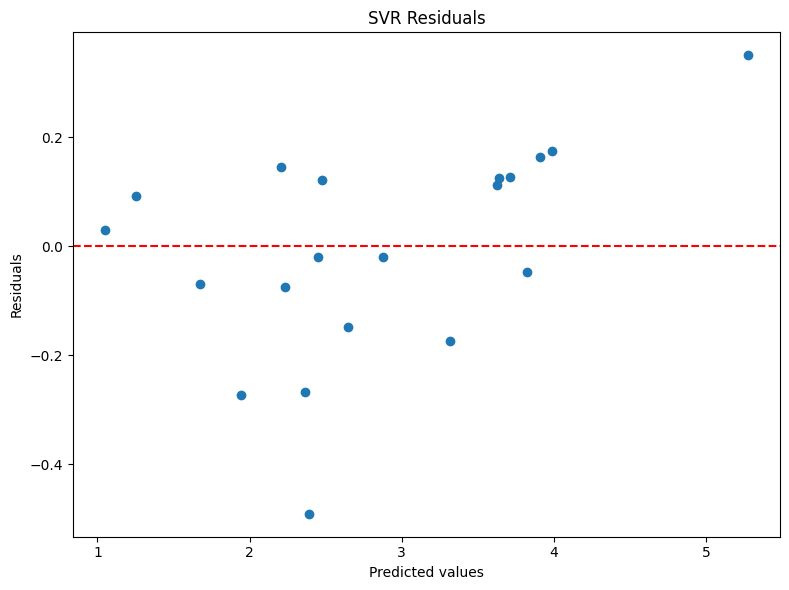

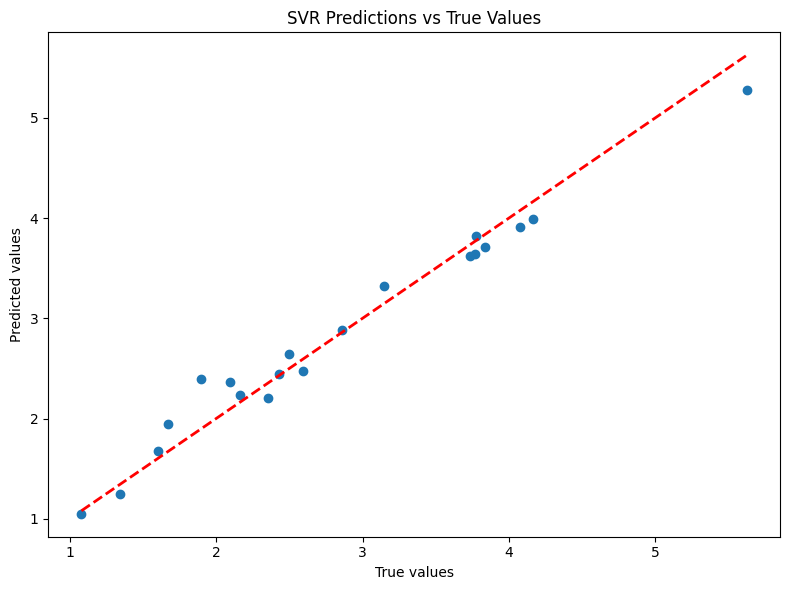

In [50]:
# SVR
plot_residuals(y_reg_test, svr_pred, 'SVR Residuals')
plot_predictions(y_reg_test, svr_pred, 'SVR Predictions vs True Values')

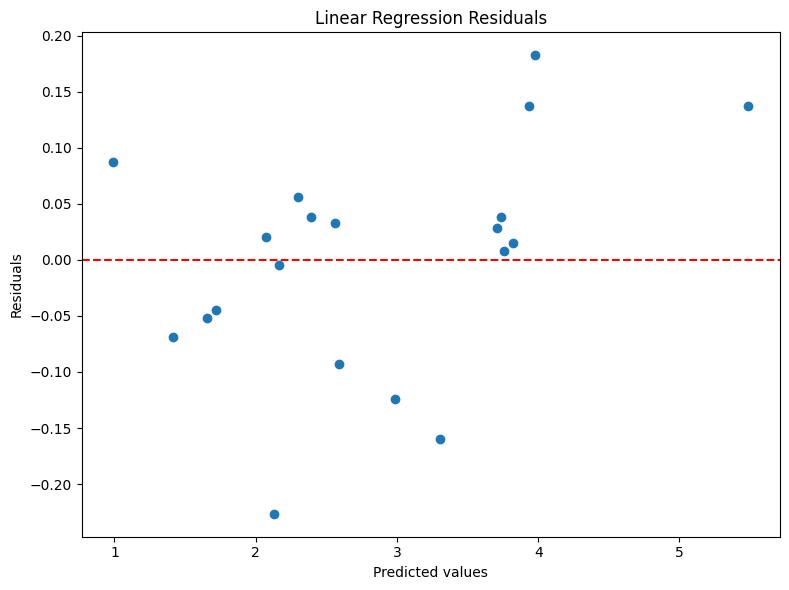

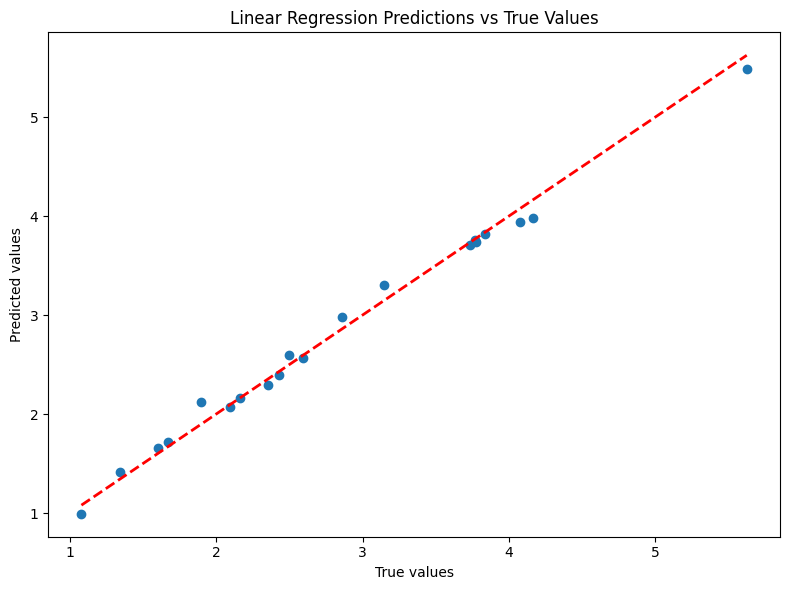

In [51]:
# Linear Regression
plot_residuals(y_reg_test, lr_pred, 'Linear Regression Residuals')
plot_predictions(y_reg_test, lr_pred, 'Linear Regression Predictions vs True Values')

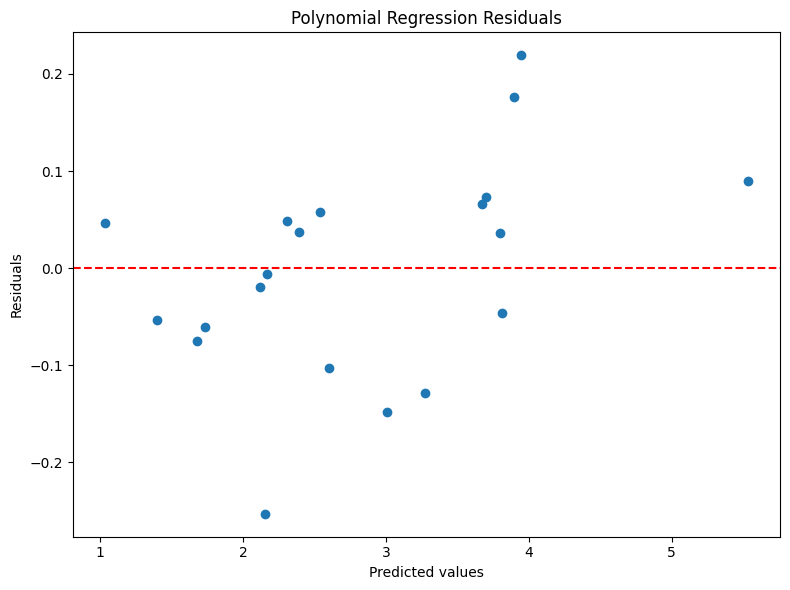

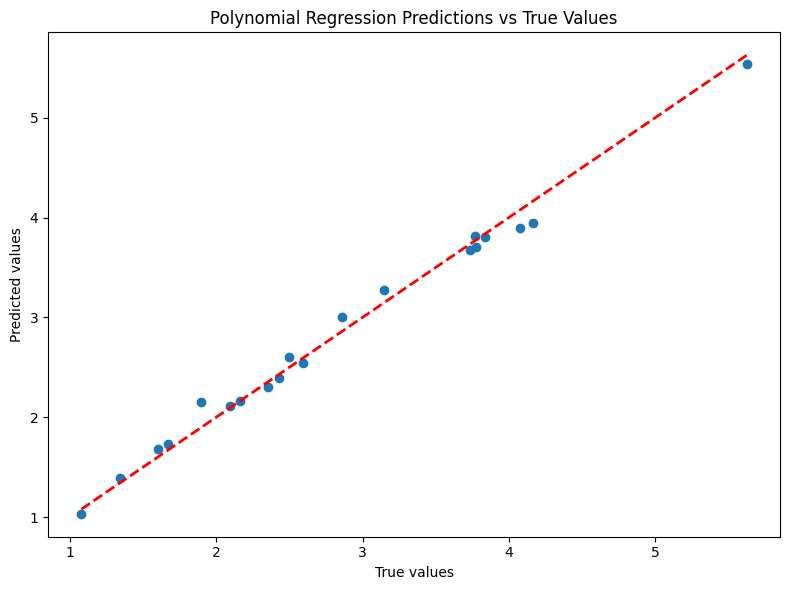

In [52]:
# Polynomial Regression
plot_residuals(y_reg_test, pr_pred, 'Polynomial Regression Residuals')
plot_predictions(y_reg_test, pr_pred, 'Polynomial Regression Predictions vs True Values')

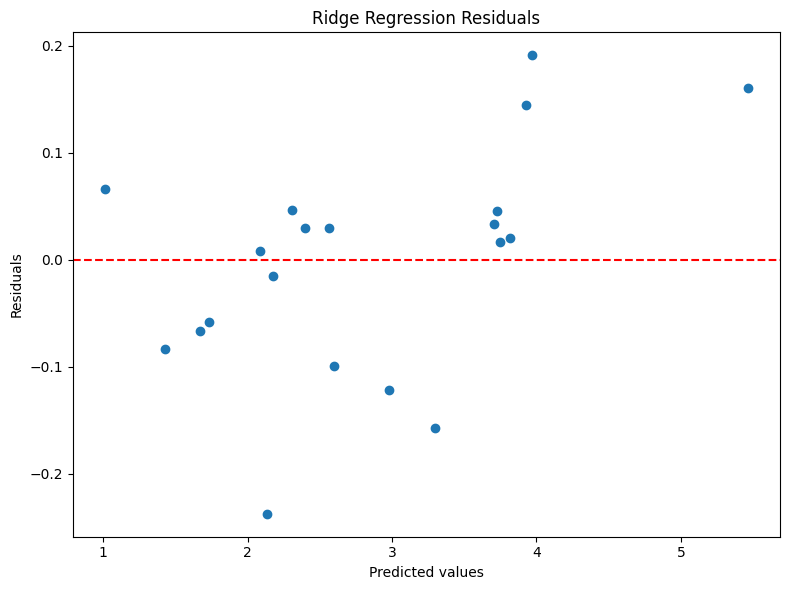

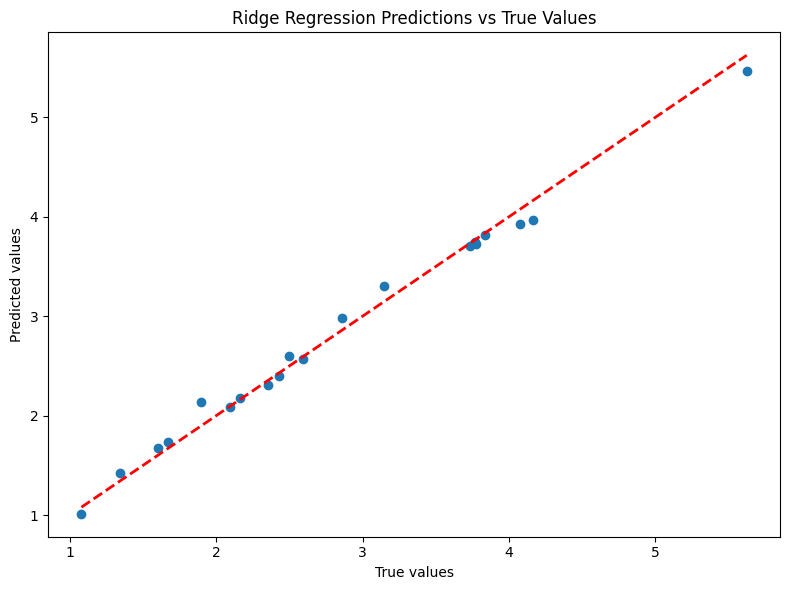

In [53]:
# Ridge Regression
plot_residuals(y_reg_test, ridge_pred, 'Ridge Regression Residuals')
plot_predictions(y_reg_test, ridge_pred, 'Ridge Regression Predictions vs True Values')

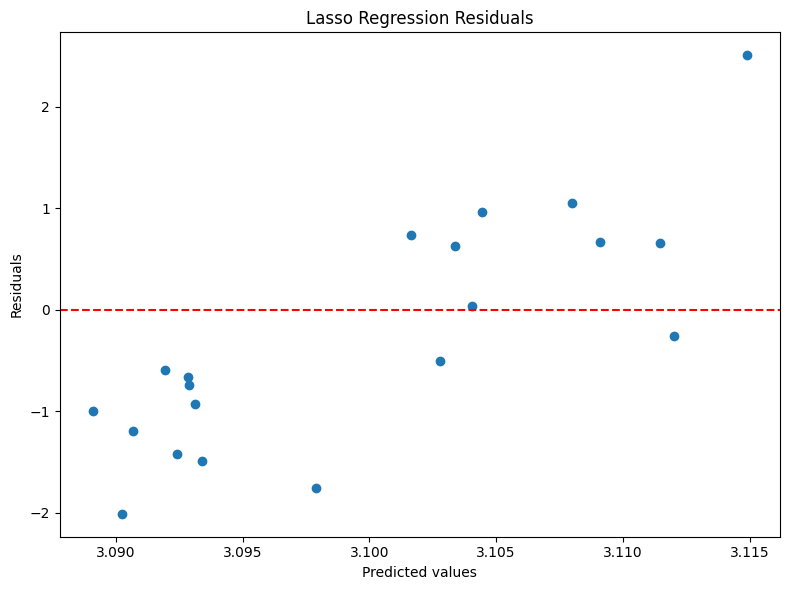

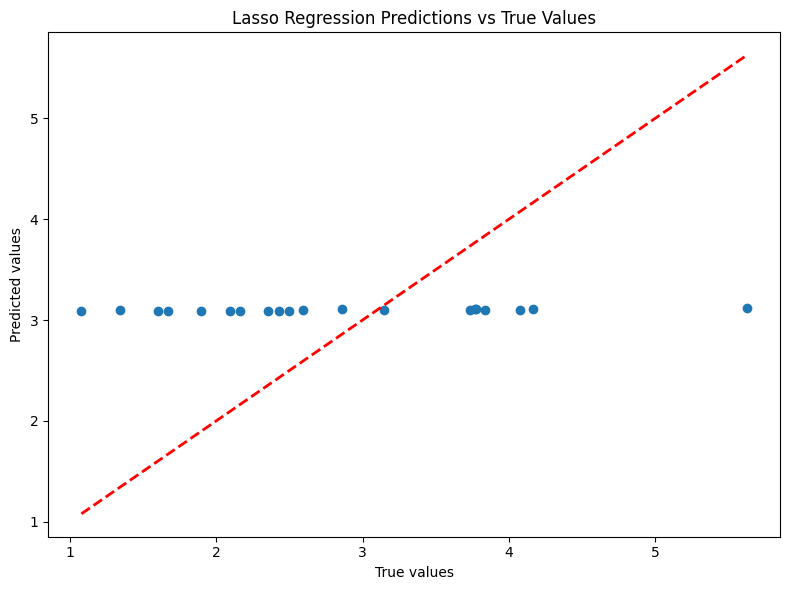

In [54]:
# Lasso Regression
plot_residuals(y_reg_test, lasso_pred, 'Lasso Regression Residuals')
plot_predictions(y_reg_test, lasso_pred, 'Lasso Regression Predictions vs True Values')

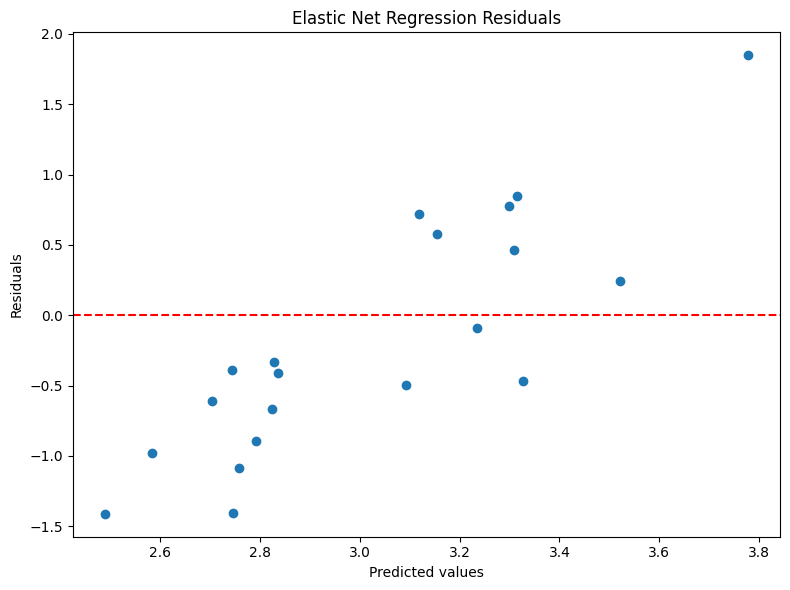

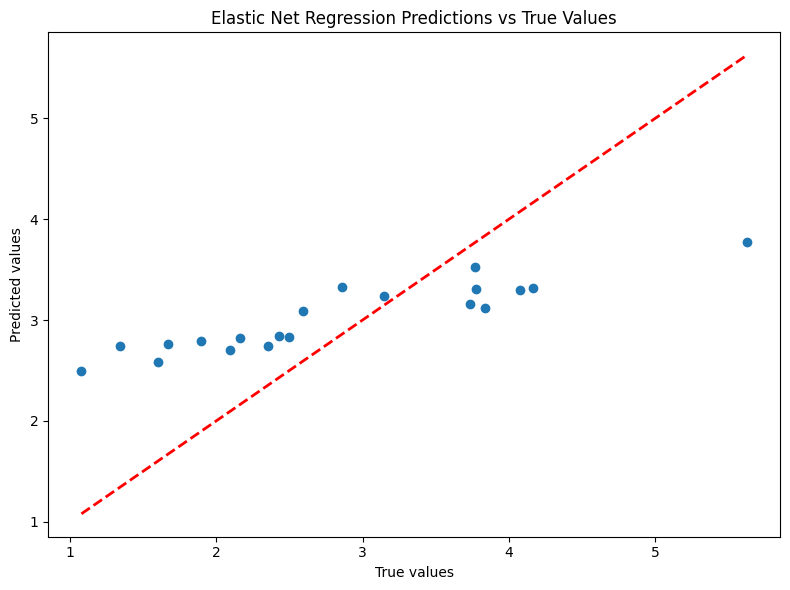

In [55]:
# Elastic Net Regression
plot_residuals(y_reg_test, elastic_pred, 'Elastic Net Regression Residuals')
plot_predictions(y_reg_test, elastic_pred, 'Elastic Net Regression Predictions vs True Values')

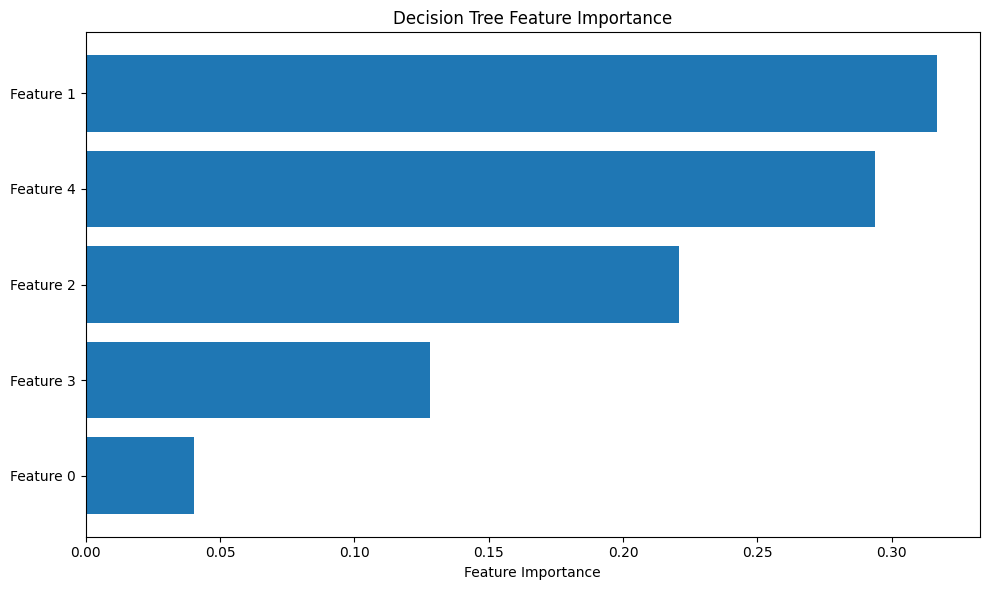

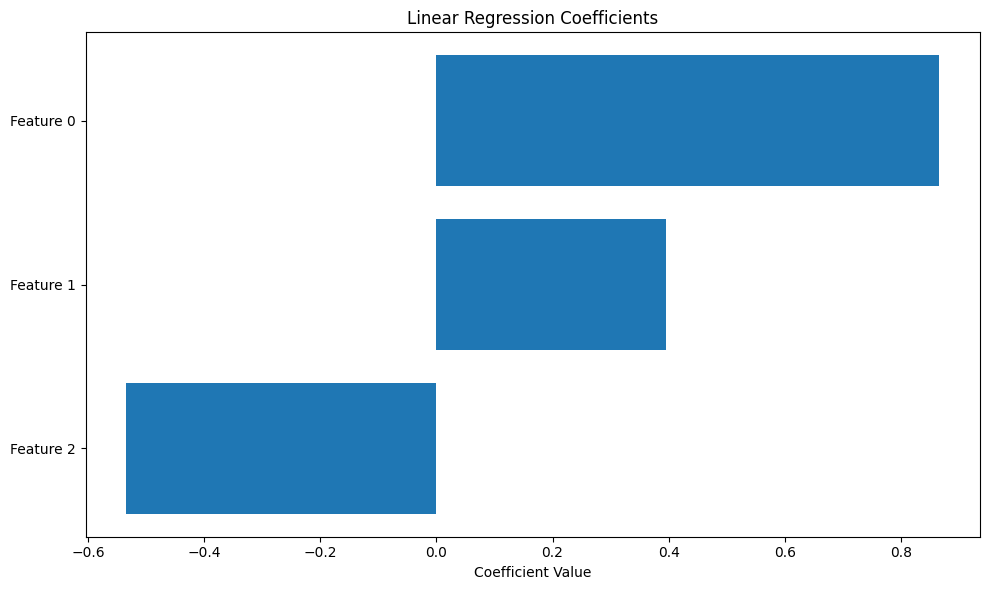

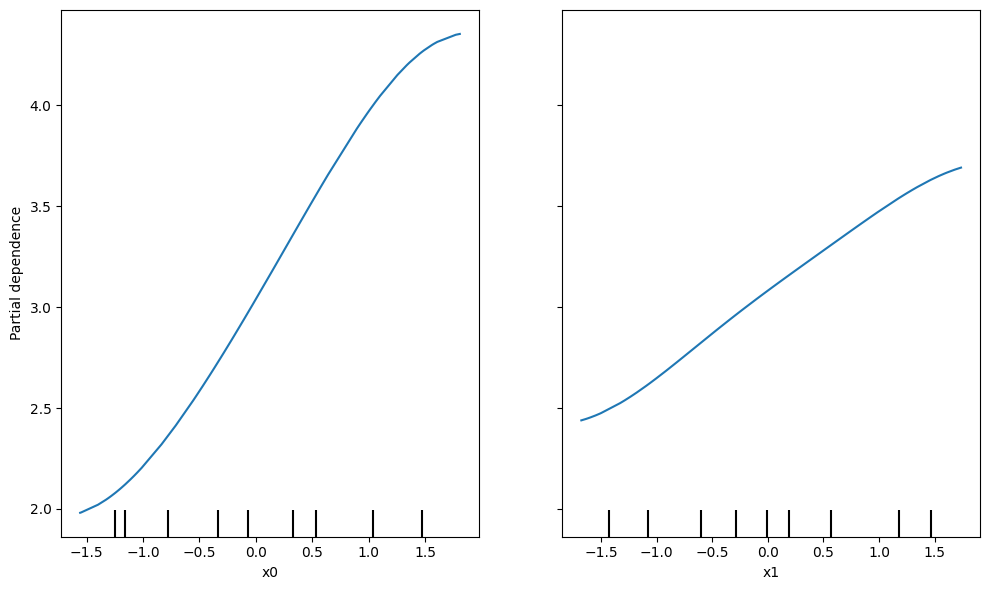

In [7]:
# Decision Tree 특성 중요도
plt.figure(figsize=(10, 6))
feature_importance = dt.feature_importances_
feature_names = [f'Feature {i}' for i in range(X_clf.shape[1])]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

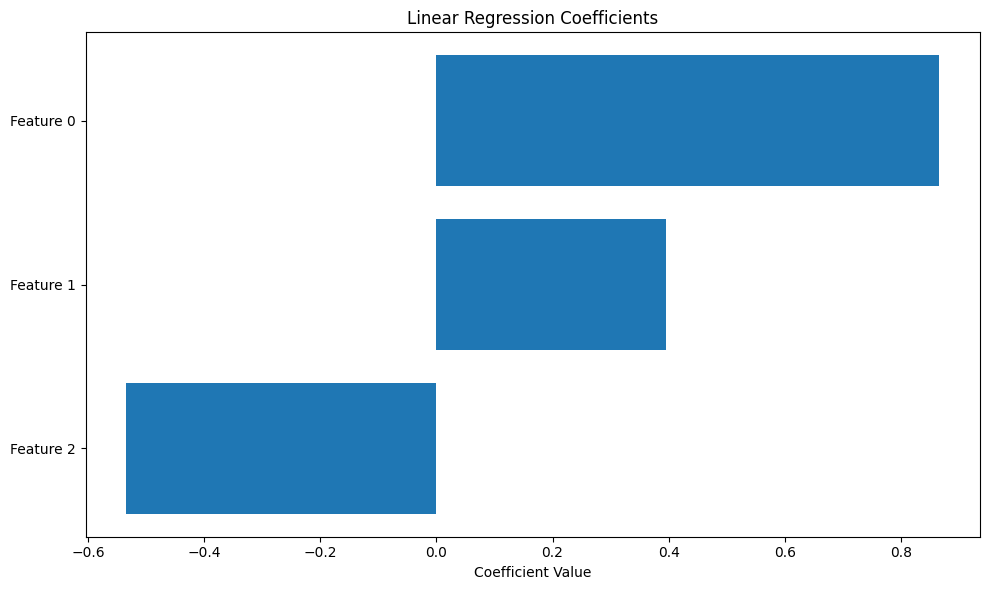

In [56]:
# Linear Regression 계수
plt.figure(figsize=(10, 6))
coefficients = lr.coef_
feature_names = [f'Feature {i}' for i in range(X_reg.shape[1])]
sorted_idx = np.argsort(coefficients)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, coefficients[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.tight_layout()
plt.show()

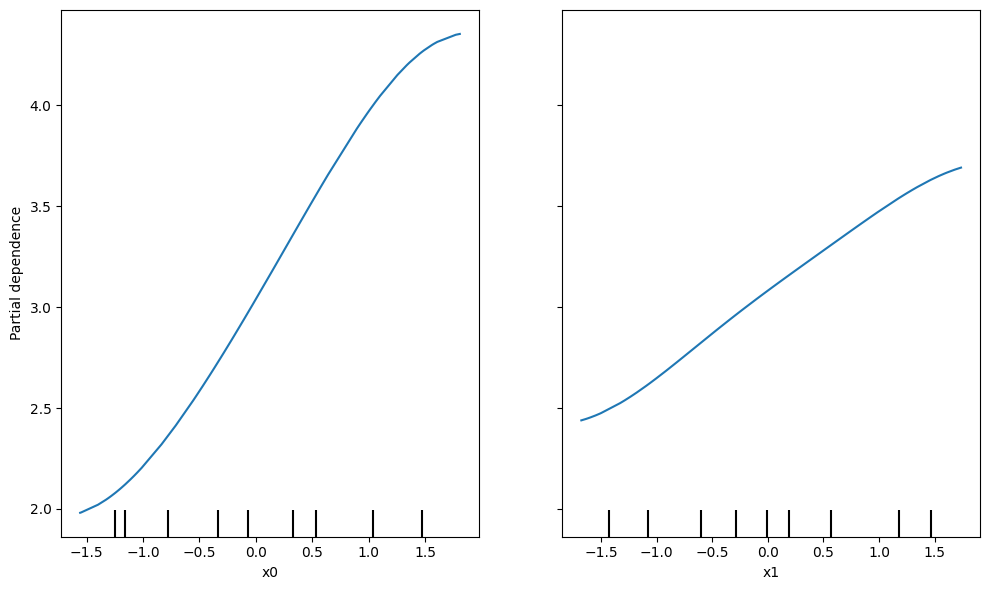

In [57]:
# SVR 부분 의존성 플롯
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(svr, X_reg_train_scaled, [0, 1], ax=ax)
plt.tight_layout()
plt.show()

### 실제 데이터를 이용한 알고리즘 구현

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import PartialDependenceDisplay

In [5]:
# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

In [10]:
# 데이터 탐색
print("데이터셋 크기:", X.shape)
print("특성 이름:", feature_names)
print("클래스 분포:", np.bincount(y))

데이터셋 크기: (569, 30)
특성 이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
클래스 분포: [212 357]


In [6]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 분류 모델 구현 및 평가
def train_and_evaluate_classifier(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    return model, y_pred

In [14]:
# k-NN
knn, knn_pred = train_and_evaluate_classifier(KNeighborsClassifier(n_neighbors=5), X_train_scaled, X_test_scaled, y_train, y_test, "k-NN")

k-NN Accuracy: 0.9474


In [15]:
# SVM
svm, svm_pred = train_and_evaluate_classifier(SVC(kernel='rbf', random_state=42), X_train_scaled, X_test_scaled, y_train, y_test, "SVM")

SVM Accuracy: 0.9825


In [16]:
# Decision Tree
dt, dt_pred = train_and_evaluate_classifier(DecisionTreeClassifier(random_state=42), X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree")

Decision Tree Accuracy: 0.9474


In [20]:
# 시각화 함수
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

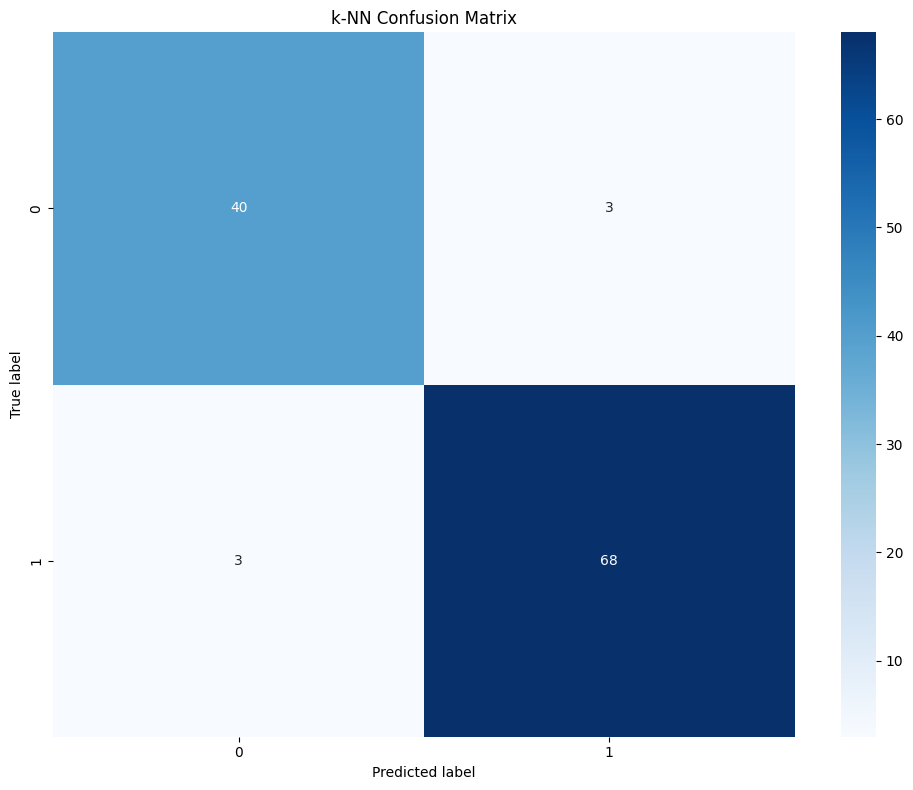

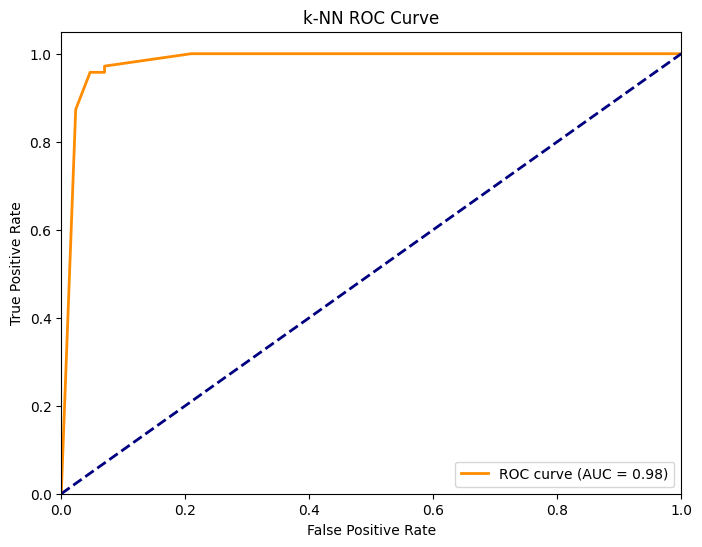

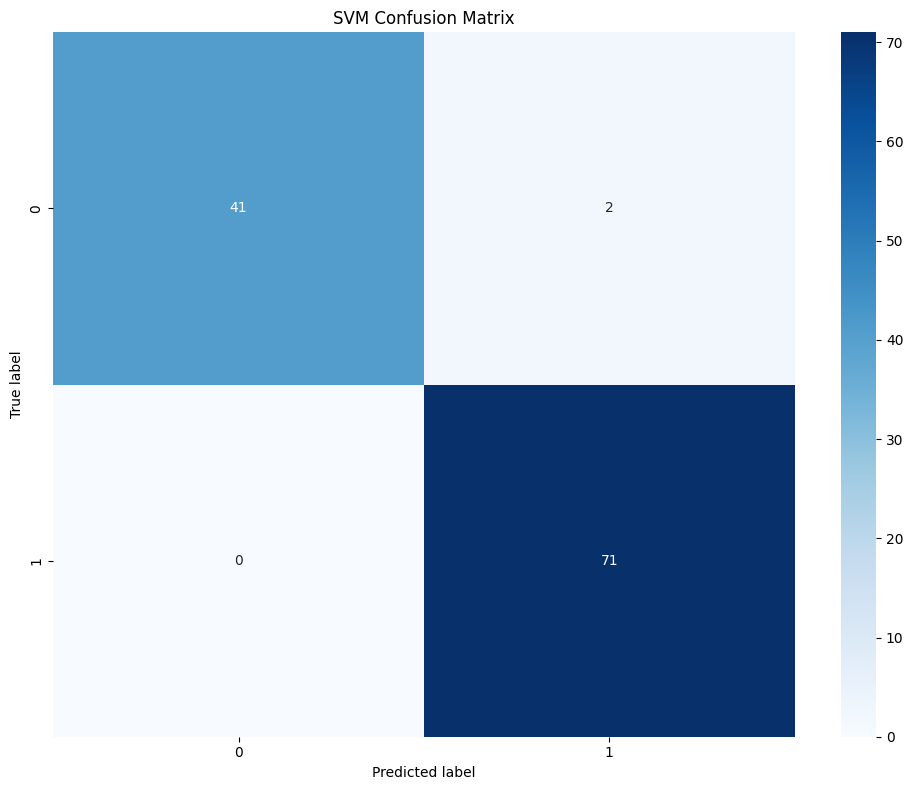

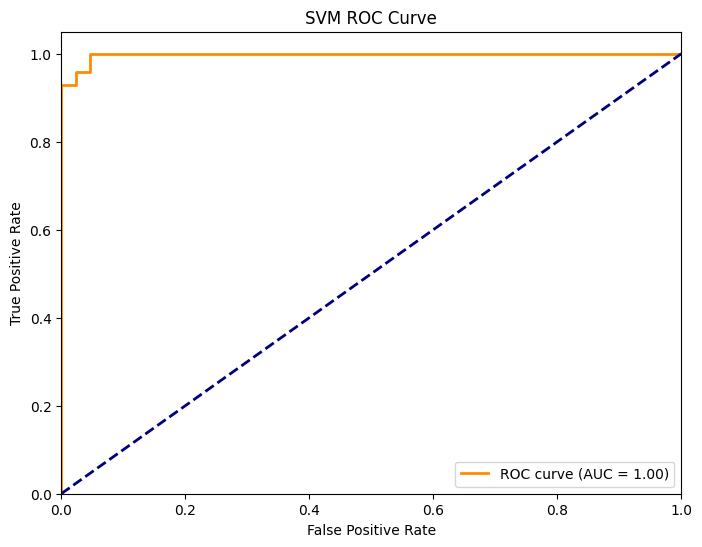

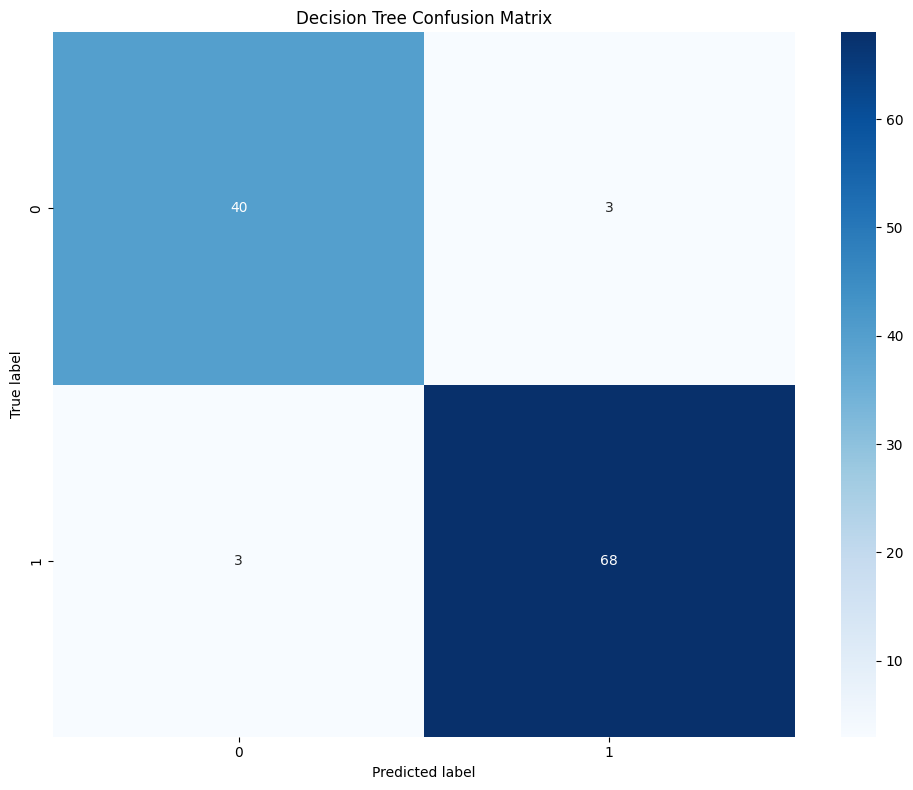

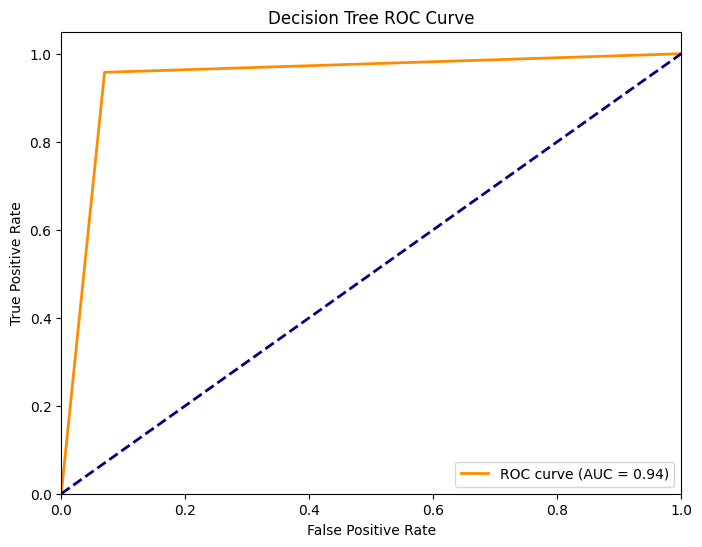

In [21]:
# 분류 모델 시각화
plot_confusion_matrix(y_test, knn_pred, 'k-NN Confusion Matrix')
plot_roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1], 'k-NN ROC Curve')

plot_confusion_matrix(y_test, svm_pred, 'SVM Confusion Matrix')
plot_roc_curve(y_test, svm.decision_function(X_test_scaled), 'SVM ROC Curve')

plot_confusion_matrix(y_test, dt_pred, 'Decision Tree Confusion Matrix')
plot_roc_curve(y_test, dt.predict_proba(X_test_scaled)[:, 1], 'Decision Tree ROC Curve')

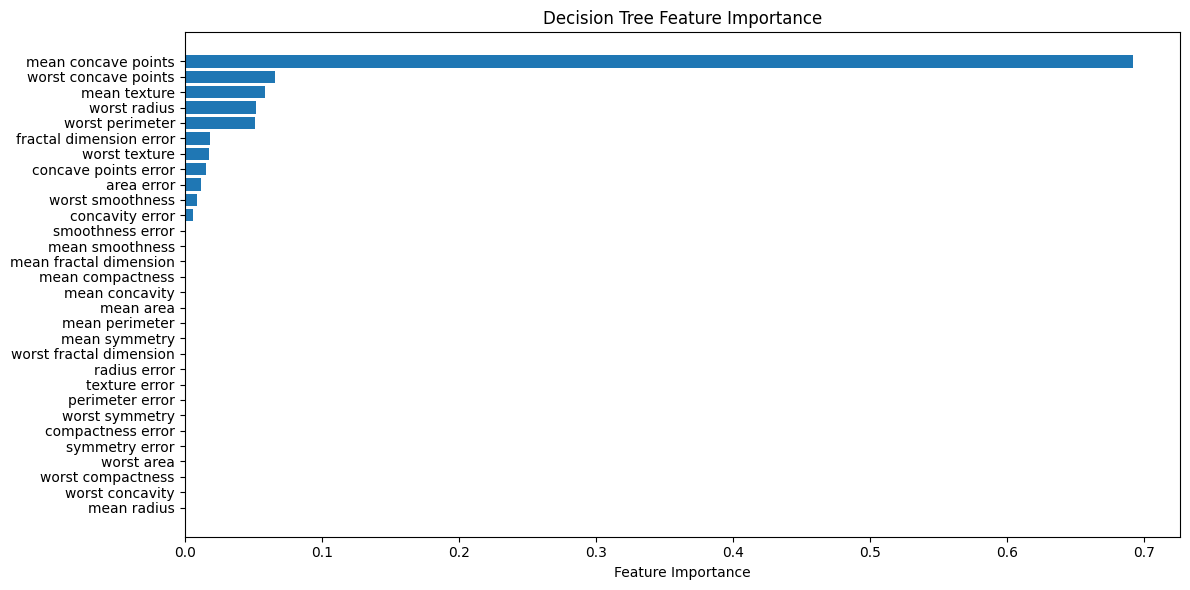

In [22]:
# 특성 중요도 시각화 (Decision Tree)
plt.figure(figsize=(12, 6))
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

In [23]:
# 회귀 모델 (mean radius를 예측하는 것으로 가정)
y_reg = X[:, 0]  # mean radius
X_reg = X[:, 1:]  # 나머지 특성들

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

X_reg_train_scaled = scaler.fit_transform(X_reg_train)
X_reg_test_scaled = scaler.transform(X_reg_test)

In [24]:
def train_and_evaluate_regressor(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.4f}")
    return model, y_pred

In [25]:
# Linear Regression
lr, lr_pred = train_and_evaluate_regressor(LinearRegression(), X_reg_train_scaled, X_reg_test_scaled, y_reg_train, y_reg_test, "Linear Regression")

Linear Regression - MSE: 0.0048, R2: 0.9996


In [26]:
# Ridge Regression
ridge, ridge_pred = train_and_evaluate_regressor(Ridge(alpha=1.0), X_reg_train_scaled, X_reg_test_scaled, y_reg_train, y_reg_test, "Ridge Regression")

Ridge Regression - MSE: 0.0054, R2: 0.9996


In [27]:
# Lasso Regression
lasso, lasso_pred = train_and_evaluate_regressor(Lasso(alpha=1.0), X_reg_train_scaled, X_reg_test_scaled, y_reg_train, y_reg_test, "Lasso Regression")

Lasso Regression - MSE: 0.9609, R2: 0.9205


In [28]:
# Elastic Net Regression
elastic, elastic_pred = train_and_evaluate_regressor(ElasticNet(alpha=1.0, l1_ratio=0.5), X_reg_train_scaled, X_reg_test_scaled, y_reg_train, y_reg_test, "Elastic Net Regression")

Elastic Net Regression - MSE: 0.7766, R2: 0.9357


In [29]:
# 회귀 모델 시각화
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title(title)
    plt.tight_layout()
    plt.show()

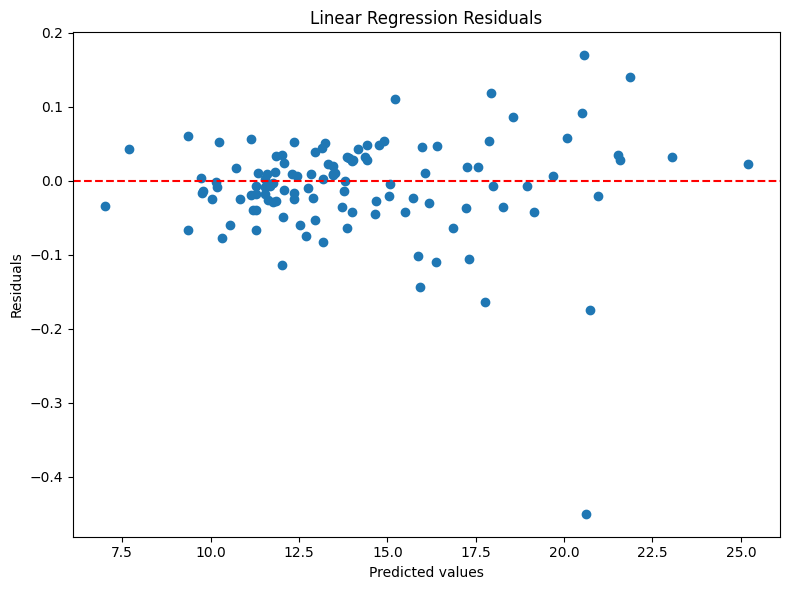

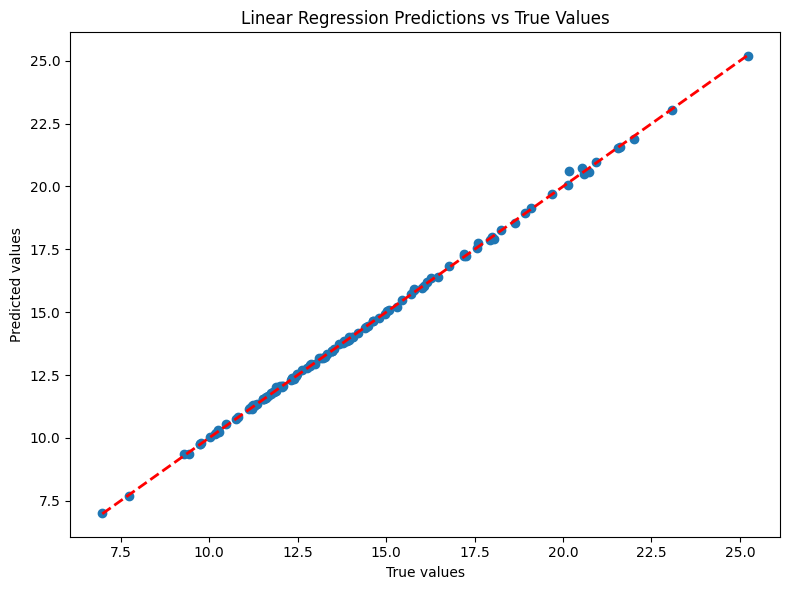

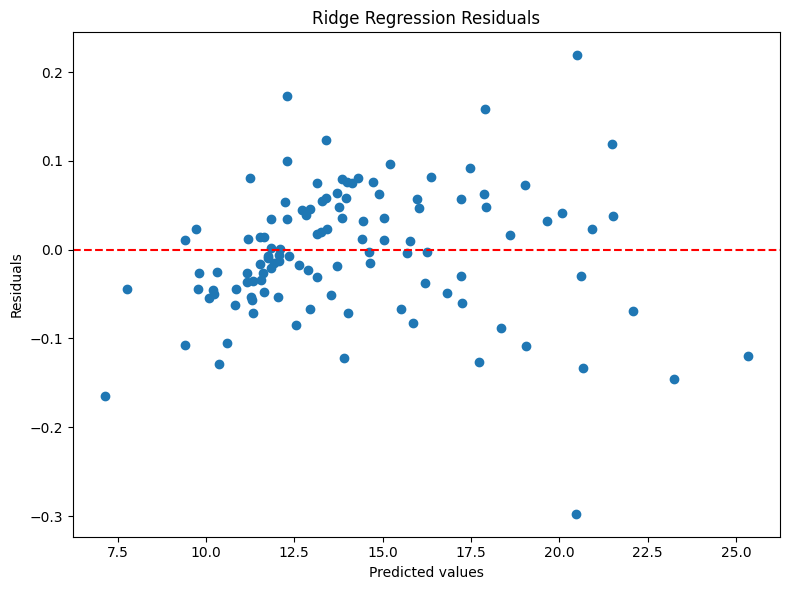

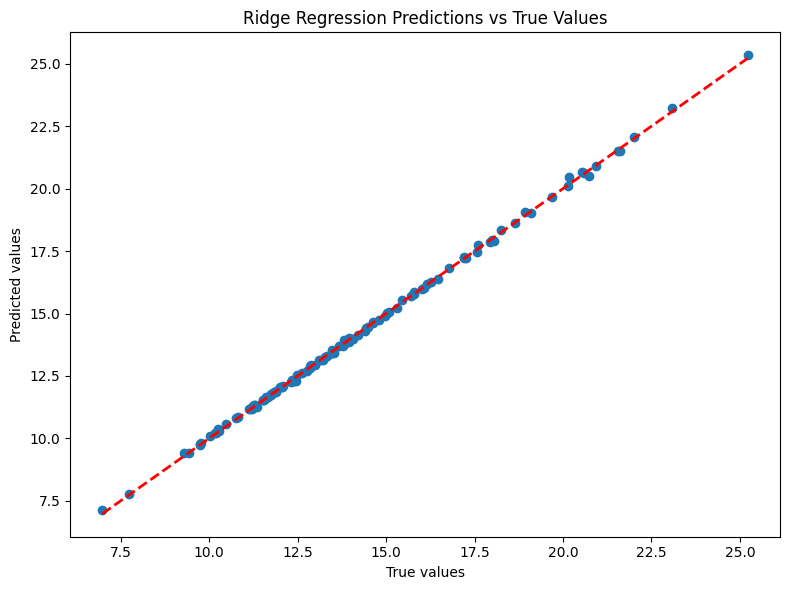

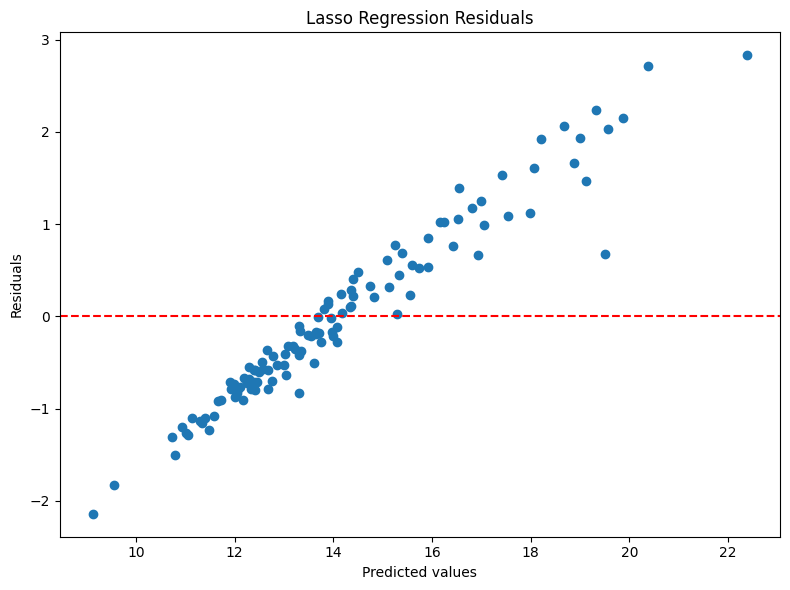

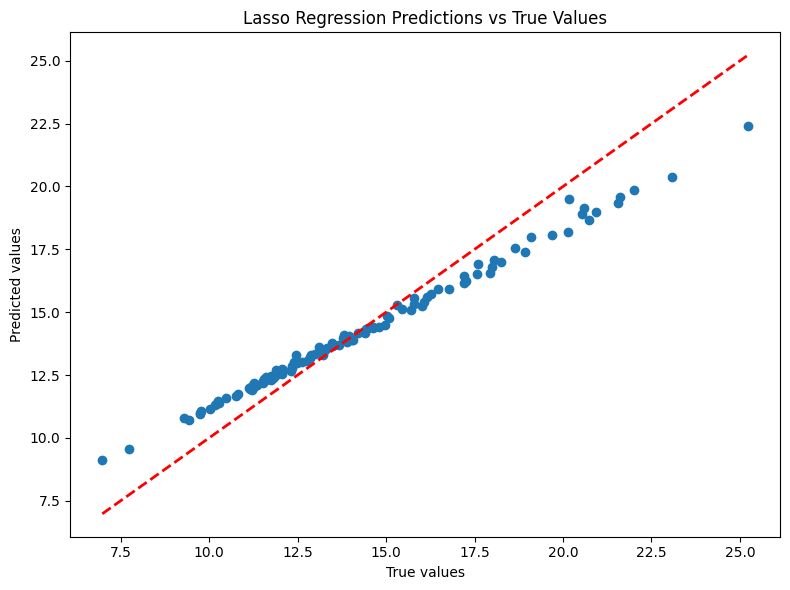

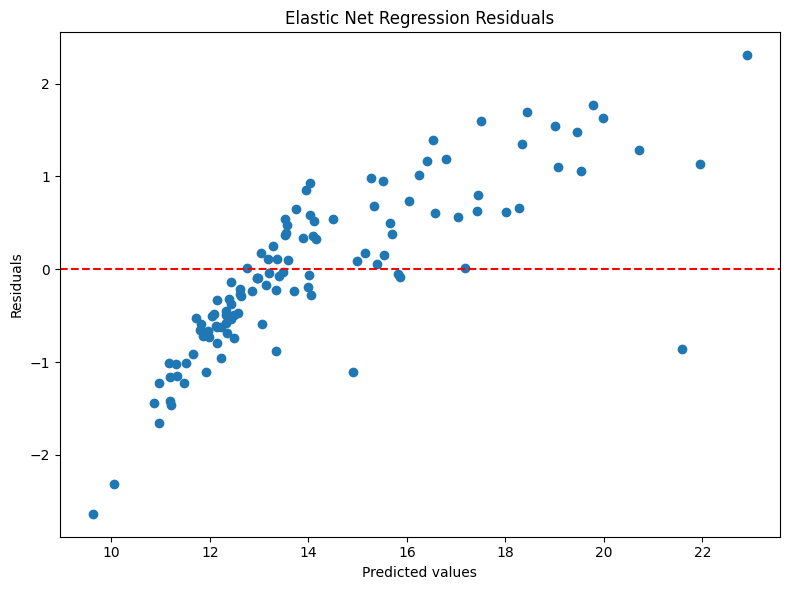

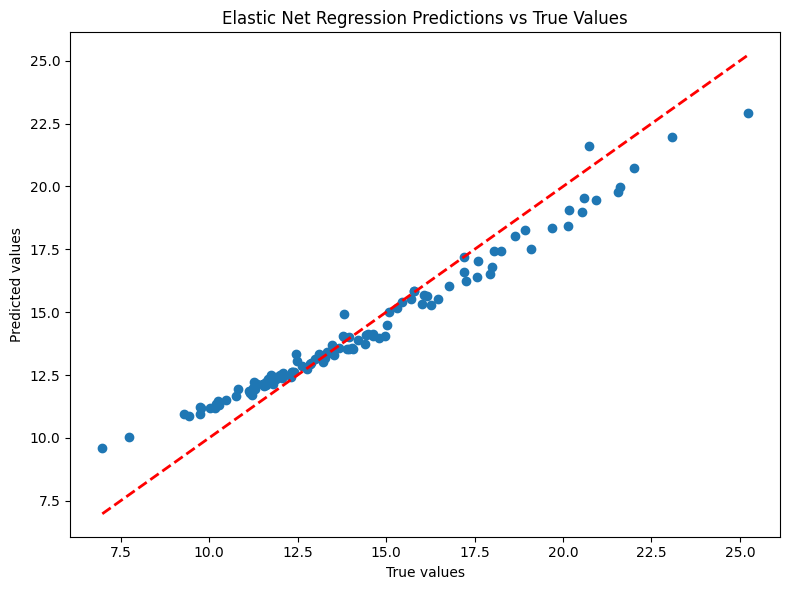

In [30]:
plot_residuals(y_reg_test, lr_pred, 'Linear Regression Residuals')
plot_predictions(y_reg_test, lr_pred, 'Linear Regression Predictions vs True Values')

plot_residuals(y_reg_test, ridge_pred, 'Ridge Regression Residuals')
plot_predictions(y_reg_test, ridge_pred, 'Ridge Regression Predictions vs True Values')

plot_residuals(y_reg_test, lasso_pred, 'Lasso Regression Residuals')
plot_predictions(y_reg_test, lasso_pred, 'Lasso Regression Predictions vs True Values')

plot_residuals(y_reg_test, elastic_pred, 'Elastic Net Regression Residuals')
plot_predictions(y_reg_test, elastic_pred, 'Elastic Net Regression Predictions vs True Values')

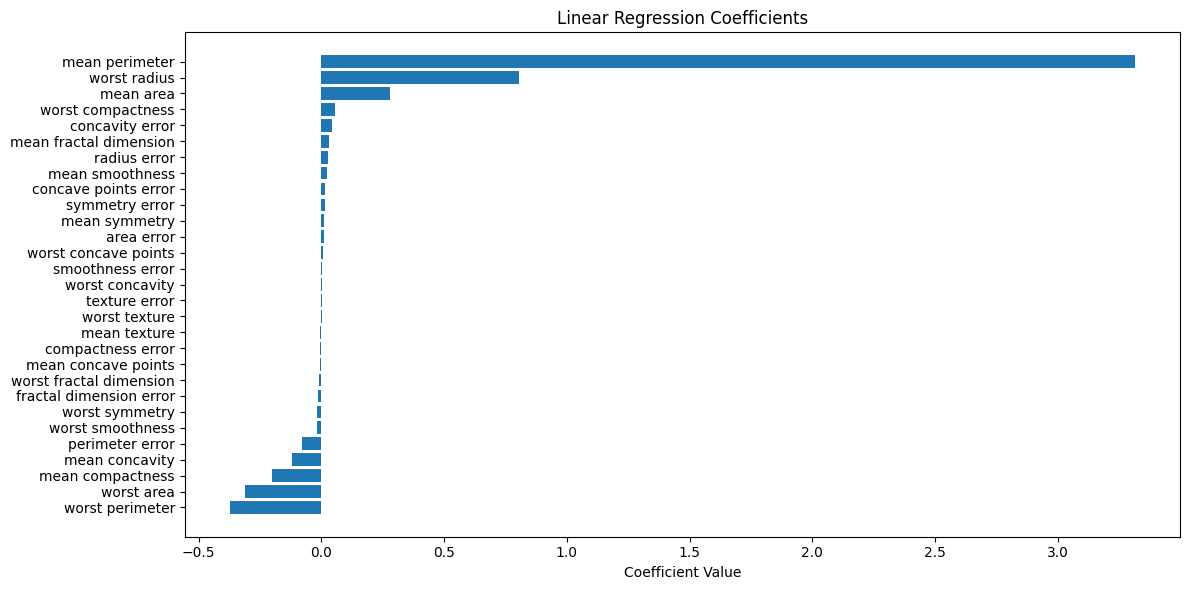

In [31]:
# Linear Regression 계수 시각화
plt.figure(figsize=(12, 6))
coefficients = lr.coef_
sorted_idx = np.argsort(coefficients)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, coefficients[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names[1:])[sorted_idx])
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.tight_layout()
plt.show()

### Ensemble

In [13]:
from sklearn.metrics import recall_score, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


In [11]:
def get_score(y_true, y_pred):
    print(f"잘못 분류한 샘플 개수: {(y_true != y_pred).sum()}")
    print(f"정확도: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_true=y_test, y_pred=y_pred):.3f}")

In [18]:
tree = DecisionTreeClassifier(max_depth=None, criterion='gini', random_state=42)
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=400,
                                max_depth=10,
                                random_state=1)

forest.fit(X_train_scaled, y_train)
forest_pred = forest.predict(X_test_scaled)

In [19]:
get_score(y_test, forest_pred)

잘못 분류한 샘플 개수: 4
정확도: 0.965
Recall: 0.986
Precision: 0.959
F1 Score: 0.972


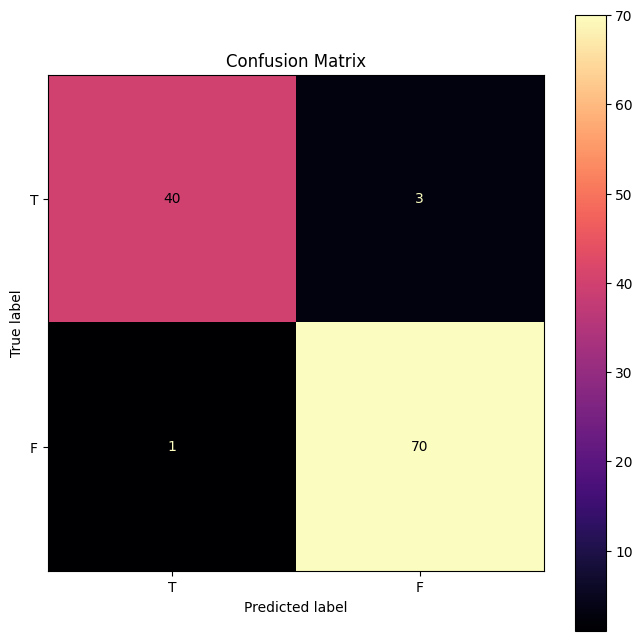

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, forest_pred, ax=ax, display_labels='TF', cmap='magma')

In [21]:
list(forest.get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'monotonic_cst',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [22]:
from sklearn.model_selection import GridSearchCV

param = {
    'max_depth':[i for i in range(1, 11)], # randomsearch: np.random.randint(0, 51),
    'n_estimators':[400, 500, 600]
}

grid = GridSearchCV(estimator=forest,
                    param_grid=param,
                    cv = 10,
                    scoring = 'roc_auc')

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=400,
                                              random_state=1),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [400, 500, 600]},
             scoring='roc_auc')

In [23]:
# 최적값 출력
print(f"최적 파라미터: {grid.best_params_}")
print(f"AUC: {grid.best_score_:.3f}")

최적 파라미터: {'max_depth': 7, 'n_estimators': 400}
AUC: 0.990


In [24]:
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=400,
                                max_depth=7,
                                random_state=1)

In [26]:
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=7, n_estimators=400, random_state=1)

In [27]:
forest_pred = forest.predict(X_test_scaled)

get_score(y_test, forest_pred)

잘못 분류한 샘플 개수: 4
정확도: 0.965
Recall: 0.986
Precision: 0.959
F1 Score: 0.972


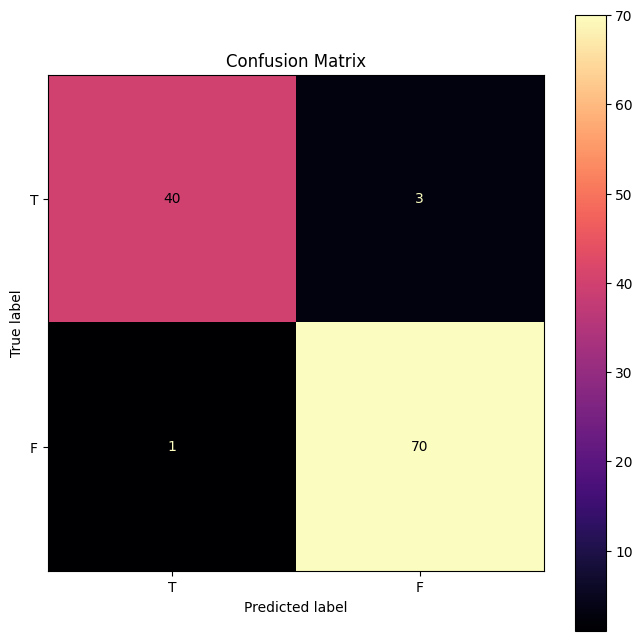

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, forest_pred, ax=ax, display_labels='TF', cmap='magma')